# Capstone M6 Project REDO

Objective: To build a classification model predicting the cause of delay, a multi-class classification task, then discovering
whether a flight will be delayed based on provided factors from this dataset

https://data.world/data-society/airlines-delay

# Exploration

In [5]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import (mean_squared_error, accuracy_score, classification_report, 
                             balanced_accuracy_score, f1_score, precision_score, 
                             confusion_matrix, roc_curve, auc, precision_recall_curve, 
                             average_precision_score, recall_score)
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, RidgeCV, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputClassifier
from sklearn.compose import ColumnTransformer
from IPython.display import Image, display
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV


In [6]:
os.listdir("Data")

['DelayedFlights.csv',
 'DelayedFlights_10k.csv',
 'DelayedFlights_500k.csv',
 'DelayedFlights_750k.csv']

In [7]:
df = pd.read_csv('Data/DelayedFlights_500k.csv')
df.sample(4) 

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
90927,293678,2008,1,30,3,1035,955,1344.0,1301,US,...,7.0,23,0,N,0,13.0,0.0,3.0,0.0,27.0
12233,34675,2008,1,13,7,2134,2125,2252.0,2245,WN,...,5.0,10,0,N,0,NaN,NaN,NaN,NaN,NaN
84248,264191,2008,1,7,1,928,900,1100.0,1035,US,...,7.0,10,0,N,0,25.0,0.0,0.0,0.0,0.0
283530,905122,2008,2,26,2,1356,1334,1602.0,1529,DL,...,17.0,15,0,N,0,0.0,0.0,33.0,0.0,0.0


# Details

- ActualElapsedTime: The actual elapsed time of the flight in minutes, takeoff to landing.
- AirTime: The time the aircraft was actually in the air.
- ArrDelay: Difference between scheduled arrival time and actual arrival time in minutes. Positive values indicate a delayed arrival.
- ArrTime: The actual arrival time of the flight, military time.
- CancellationCode: If the flight was canceled, this column indicates the reason: A: Carrier B: Weather C: National Air System D: Security.
- Cancelled: binary (0 or 1) whether the flight was canceled or not.
- CarrierDelay: The delay in minutes caused by the carrier (e.g., due to maintenance issues).
- CRSArrTime: The scheduled arrival time according to the CRS.
- CRSElapsedTime: The scheduled elapsed time of the flight in minutes, as per CRS (Carrier's Reservation System).
- CRSDepTime: The scheduled departure time: Carrier's Reservation System (CRS).
- DayOfWeek: The day of the week when the flight took place, 1 for Monday, 2 for Tuesday, etc.
- DayofMonth: The day of the month when the flight took place.
- DepDelay: The difference between the scheduled departure time and the actual departure time in minutes. Positive values indicate a delayed departure.
- DepTime: The actual departure time (in hours and minutes in military time).
- Dest: The destination airport.
- Distance: The distance between the origin and destination airports in miles.
- Diverted: binary indicator (0-1) showing flight was diverted to another airport.
- FlightNum: The flight number assigned by the airline.
- LateAircraftDelay: The delay in minutes caused by the late arrival of the aircraft from a previous flight.
- NASDelay: The delay in minutes caused by the National Air System, including non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- Origin: The airport of origin.
- SecurityDelay: The delay in minutes caused by security-related issues.
- TaxiIn: The time in minutes that the aircraft spent taxiing from the runway to the gate after landing.
- TaxiOut: The time in minutes that the aircraft spent taxiing from the gate to the runway before takeoff.
- TailNum: unique aircraft tail number.
- UniqueCarrier: Carrier code for airline.
- Year: The year when the flight took place. (all within 2008)ok place. (all within 2008)

# EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         499999 non-null  int64  
 1   Year               499999 non-null  int64  
 2   Month              499999 non-null  int64  
 3   DayofMonth         499999 non-null  int64  
 4   DayOfWeek          499999 non-null  int64  
 5   DepTime            499999 non-null  int64  
 6   CRSDepTime         499999 non-null  int64  
 7   ArrTime            498064 non-null  float64
 8   CRSArrTime         499999 non-null  int64  
 9   UniqueCarrier      499999 non-null  object 
 10  FlightNum          499999 non-null  int64  
 11  TailNum            499998 non-null  object 
 12  ActualElapsedTime  498064 non-null  float64
 13  CRSElapsedTime     499921 non-null  float64
 14  AirTime            498064 non-null  float64
 15  ArrDelay           498064 non-null  float64
 16  De

In [12]:
df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                1935
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   1
ActualElapsedTime      1935
CRSElapsedTime           78
AirTime                1935
ArrDelay               1935
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 1935
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         170299
WeatherDelay         170299
NASDelay             170299
SecurityDelay        170299
LateAircraftDelay    170299
dtype: int64

In [13]:
# Preprocessing
delay_columns = ['ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df[delay_columns] = df[delay_columns].fillna(0)

time_columns = ['ArrTime', 'ActualElapsedTime', 'AirTime', 'TaxiIn']
df[time_columns] = df[time_columns].fillna(df[time_columns].median())

# Drop irrelevant columns
df = df.drop(columns=['Unnamed: 0', 'TailNum', 'Year'])
df = df.dropna(subset=['ArrDelay', 'DepDelay', 'ActualElapsedTime', 'ArrTime', 'CRSElapsedTime'])

In [14]:
print(df.isnull().sum())
print(df.shape)

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64
(499921, 27)


In [15]:
# Duplicates:
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates() # only 2 duplicates

Duplicate rows: 2


In [16]:
# # Analyzing average arrival and departure delay by UniqueCarrier, Origin, and Dest
# carrier_delay_analysis = df.groupby('UniqueCarrier')[['ArrDelay', 'DepDelay']].mean().reset_index()
# origin_delay_analysis = df.groupby('Origin')[['ArrDelay', 'DepDelay']].mean().reset_index()
# dest_delay_analysis = df.groupby('Dest')[['ArrDelay', 'DepDelay']].mean().reset_index()

# print("Average delays by Carrier:")
# print(carrier_delay_analysis)
# print("\nAverage delays by Origin:")
# print(origin_delay_analysis)
# print("\nAverage delays by Destination:")
# print(dest_delay_analysis)

In [17]:
# New features: Weekend and Holiday
df['IsWeekend'] = df['DayOfWeek'].isin([6, 7]).astype(int)  # 1 if weekend, else 0
df['IsHoliday'] = ((df['Month'] == 12) & (df['DayofMonth'] == 25)).astype(int)  # 1 if Christmas Day, else 0
df['TimeDifference'] = df['CRSArrTime'] - df['CRSDepTime']  # Scheduled time difference

df['AverageDelayLastWeek'] = df.groupby(['Origin', 'Dest'])['ArrDelay'].transform(lambda x: x.rolling(7, min_periods=1).mean())
# calculates the average arrival delay over the last week for each route (defined by origin and destination), stores in a new column.

# Visuals

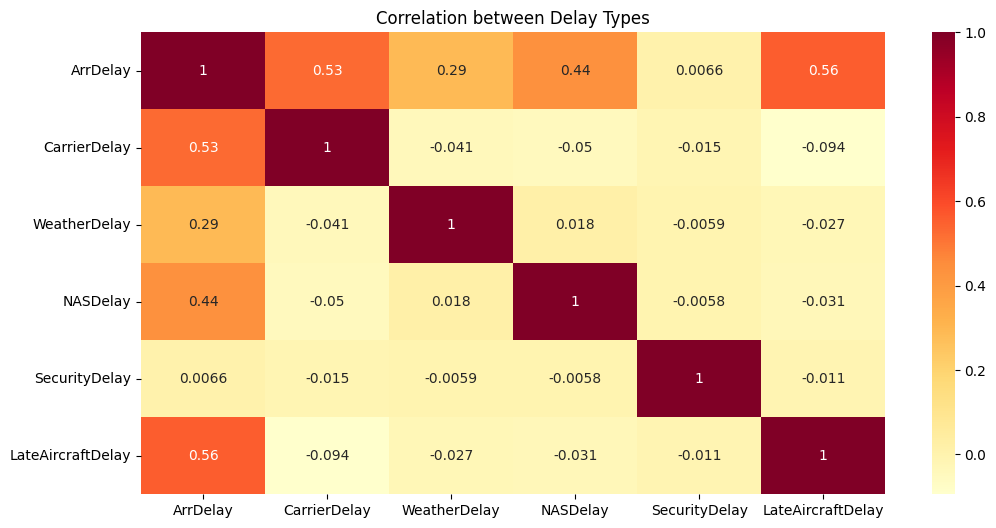

In [19]:
# Relationship between delay types
plt.figure(figsize=(12, 6))
sns.heatmap(df[delay_columns].corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation between Delay Types')
plt.show()

In [20]:
# Arrdelay are influenced by carrier and late aircraft delays.
# Weather delays show little correlation with other delays.
# NASDelay moderately affects Arrdelays
# Security delays are isolated **
# Late aircraft delays strongly impact arrival delays, minimal correlation with others.

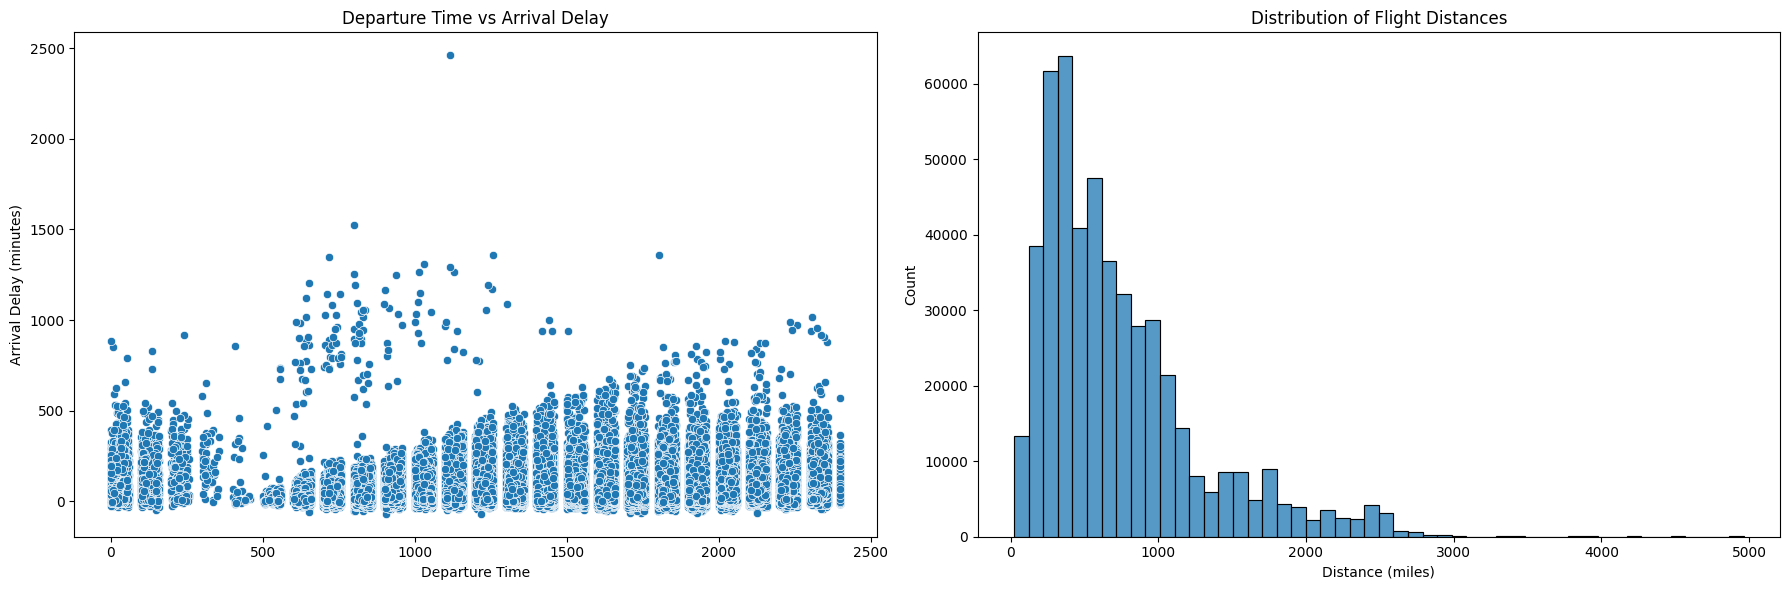

In [21]:
# 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot for Departure Time vs Arrival Delay
sns.scatterplot(x='DepTime', y='ArrDelay', data=df, ax=axs[0])
axs[0].set_title('Departure Time vs Arrival Delay')
axs[0].set_xlabel('Departure Time')
axs[0].set_ylabel('Arrival Delay (minutes)')

# Histogram for Distribution of Flight Distances
sns.histplot(df['Distance'], bins=50, ax=axs[1])
axs[1].set_title('Distribution of Flight Distances')
axs[1].set_xlabel('Distance (miles)')
axs[1].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

In [22]:
# Wide distribution of arrival delays across different departure times, 
# departure time may not be a predictor of arrival delay.
# later departure times tend to have longer arrival delays *

# Most flights are shorter than 1,000 miles, long tail of longer flights.

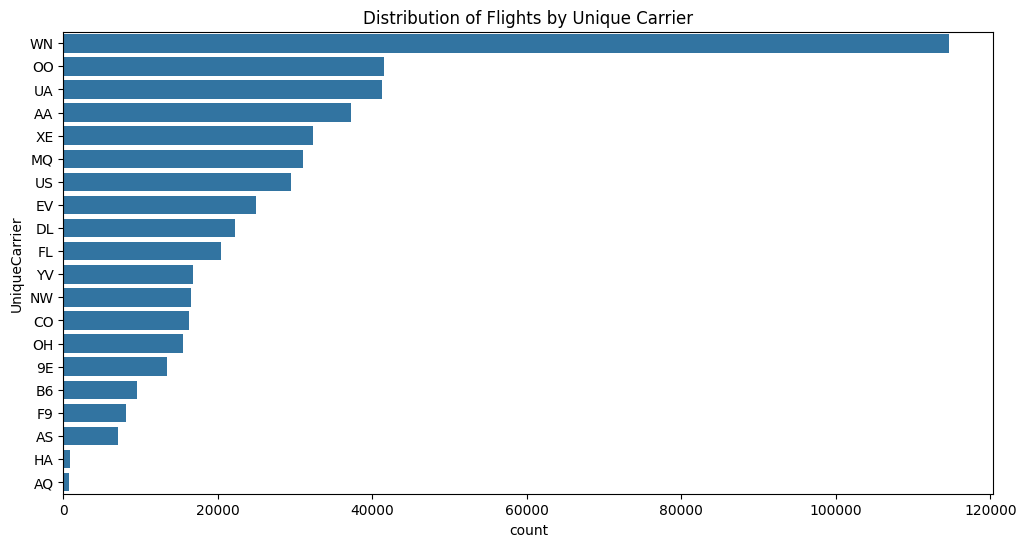

In [23]:
# Distribution of UniqueCarriers
plt.figure(figsize=(12, 6))
sns.countplot(y=df['UniqueCarrier'], order=df['UniqueCarrier'].value_counts().index)
plt.title('Distribution of Flights by Unique Carrier')
plt.show()

C:\Users\741mp\AppData\Local\Temp\ipykernel_3724\1952764512.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend().remove()  # not needed


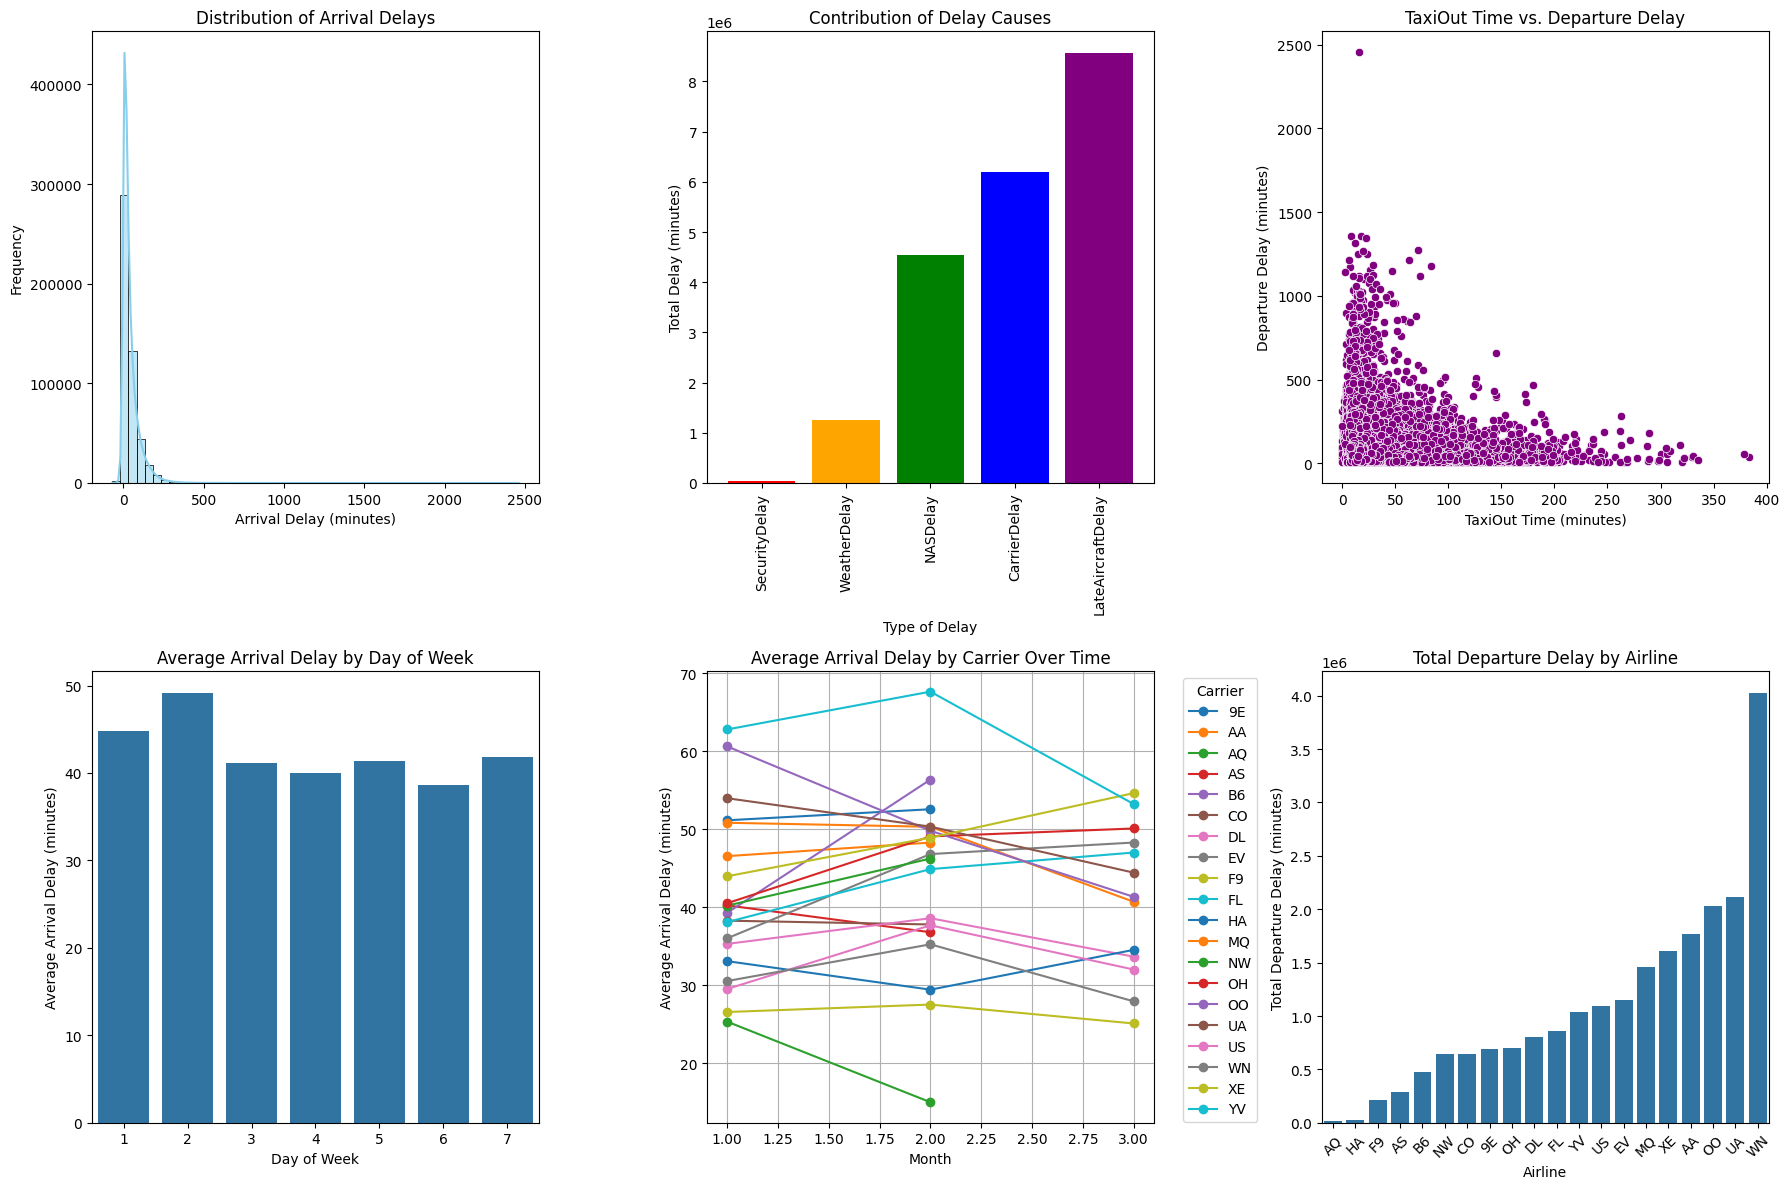

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Arrival Delays
sns.histplot(df['ArrDelay'], bins=50, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Arrival Delays')
axs[0, 0].set_xlabel('Arrival Delay (minutes)')
axs[0, 0].set_ylabel('Frequency')

# Contribution of Delay Causes
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_sums = df[delay_cols].sum().sort_values(ascending=True)
delay_sums.plot(kind='bar', stacked=True, color=['red', 'orange', 'green', 'blue', 'purple'], width=0.8, ax=axs[0, 1])
axs[0, 1].set_title('Contribution of Delay Causes')
axs[0, 1].set_xlabel('Type of Delay')
axs[0, 1].set_ylabel('Total Delay (minutes)')

# TaxiOut Time vs. Departure Delay
sns.scatterplot(x='TaxiOut', y='DepDelay', data=df, color='purple', ax=axs[0, 2])
axs[0, 2].set_title('TaxiOut Time vs. Departure Delay')
axs[0, 2].set_xlabel('TaxiOut Time (minutes)')
axs[0, 2].set_ylabel('Departure Delay (minutes)')

# Average Arrival Delay by DayOfWeek
avg_delay_by_day = df.groupby('DayOfWeek')['ArrDelay'].mean().reset_index()
sns.barplot(x='DayOfWeek', y='ArrDelay', data=avg_delay_by_day, ax=axs[1, 0])  
axs[1, 0].set_title('Average Arrival Delay by Day of Week')
axs[1, 0].set_xlabel('Day of Week')
axs[1, 0].set_ylabel('Average Arrival Delay (minutes)')
axs[1, 0].legend().remove()  # not needed

# Average Arrival Delay by Carrier Over Time
avg_delay_by_carrier_month = df.groupby(['Month', 'UniqueCarrier'])['ArrDelay'].mean().unstack()
avg_delay_by_carrier_month.plot(kind='line', marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Average Arrival Delay by Carrier Over Time')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average Arrival Delay (minutes)')
axs[1, 1].legend(title='Carrier', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1, 1].grid(True)

# Total Departure Delay by Airline
total_dep_delay = df.groupby('UniqueCarrier')['DepDelay'].sum().sort_values(ascending=True).reset_index()
sns.barplot(x='UniqueCarrier', y='DepDelay', data=total_dep_delay, ax=axs[1, 2])  
axs[1, 2].set_title('Total Departure Delay by Airline')
axs[1, 2].set_xlabel('Airline')
axs[1, 2].set_ylabel('Total Departure Delay (minutes)')
axs[1, 2].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

plt.tight_layout()
plt.show()

In [25]:
# 1: most flights arrive on time or with minimal delays, there are small number of flights with significant delays towards the right

# 2: Late Aircraft Delay is the most significant contributor to total delay minutes
# 2nd due to issues under the airline's control  (crew problems / maintenance)
# 3rd is National Aviation System (NAS), which could be due to issues like heavy air traffic or airport operations

# 3: Relationship btw TaxiOut Time and Departure Delay
# Most flights have shorter TaxiOut times and correspondingly lower Departure Delays.
# Departure Delay tends to decrease as TaxiOut time increases

# 4: many travelers during all dats of the week, significally tuesday, Friday & Saturday.

# 5: chaotic chart showing different airlines, XE (yellow) and XN (grey) seems to do well in keeping average arrival delays to a minimul, 
# NW only did well for 2 months (?)

# 6: WN seems to have the least total arrival delay of any airline,

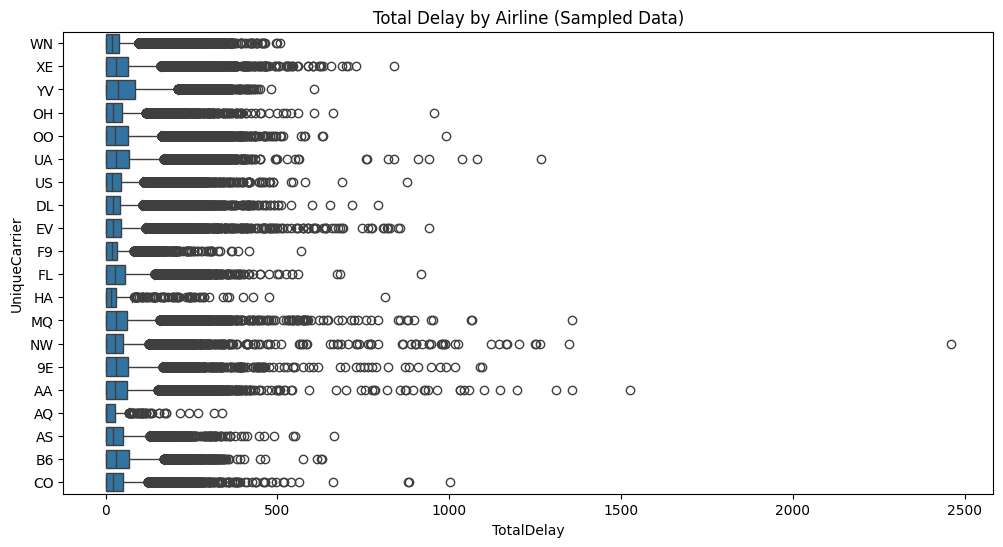

In [26]:
# Feature engineering for top 3 delay causes
df['TotalDelay'] = df['CarrierDelay'] + df['NASDelay'] + df['LateAircraftDelay']

# Plot distributions of delays by airline using the sample
plt.figure(figsize=(12, 6))
sns.boxplot(x='TotalDelay', y='UniqueCarrier', data=df)
plt.title('Total Delay by Airline (Sampled Data)')
plt.show()

In [27]:
# AQ seems to do the best in avoiding delays overall, even outliers, would be wise to find out why other airlines are so impacted.
# NW has some very large outlier values
# Model will figure out: why certain airlines may be dealing with specific types of delays

# overall the majority of airlines manage to keep their percentiles quite low, outliers are certainly extremes, overall expected, nice to see AQ does do well amongst the others. Might be a new airline.

# Clasification

In [29]:
# Making a Binary classification target for whether a flight is delayed or not
df['IsDelayed'] = np.where(df['ArrDelay'] > 15, 1, 0) # 1 if true, 0 for false.
print(df['IsDelayed'].value_counts()) # 1 = Delayed

IsDelayed
1    321225
0    178694
Name: count, dtype: int64


In [30]:
# 448,691 instances where flights are delayed in 2008
# 51,228 instances where flights are not delayed in 2008

In [31]:
delay_rate = df.groupby('UniqueCarrier')['IsDelayed'].mean() # Delay rate by carrier
delay_rate_sorted = delay_rate.sort_values(ascending=False) # Sort delay rate from highest to lowest

print("Delay Rate by Carrier:")
print(delay_rate_sorted)

Delay Rate by Carrier:
UniqueCarrier
YV    0.767385
OH    0.726850
9E    0.716599
MQ    0.714263
OO    0.707853
NW    0.696133
XE    0.691854
AA    0.691566
UA    0.680543
FL    0.672764
B6    0.657953
EV    0.648034
AS    0.611521
CO    0.595481
DL    0.589495
US    0.560288
WN    0.551812
F9    0.541621
HA    0.493785
AQ    0.428000
Name: IsDelayed, dtype: float64


In [32]:
# the above results show Carriers with higher percentage of delayed flights overall, flying with YV is a big risk to face delays

In [33]:
# Average delay time for delayed flights by carrier
delayed_flights = df[df['ArrDelay'] > 0]
avg_delay_time = delayed_flights.groupby('UniqueCarrier')['ArrDelay'].mean()

# Sort average delay time from highest to lowest
avg_delay_time_sorted = avg_delay_time.sort_values(ascending=False)

print("\nAverage Delay Time by Carrier (for Delayed Flights):")
print(avg_delay_time_sorted)


Average Delay Time by Carrier (for Delayed Flights):
UniqueCarrier
YV    65.427691
B6    57.643503
UA    56.742598
9E    56.249317
OO    54.864445
XE    54.675738
MQ    53.953470
AA    53.033288
OH    50.743485
EV    49.399822
FL    47.921885
NW    47.359825
CO    45.587939
AS    45.378810
DL    42.520730
US    42.028927
HA    36.903388
WN    36.251328
F9    29.104622
AQ    26.198777
Name: ArrDelay, dtype: float64


In [34]:
# Carriers at the top of the list have higher average delay total times for their delayed flights. 
# higher likelihood of significant delays for that airline.
# flying with Yv showws that if you do get stuck in a delay, it will likely take 65min average to deal with. 

In [35]:
# Carrier with highest delay rate
highest_delay_rate_carrier = delay_rate_sorted.index[0]
highest_delay_rate = delay_rate_sorted.iloc[0]

print(f"\nCarrier with highest delay rate: {highest_delay_rate_carrier}")
print(f"Delay rate: {highest_delay_rate:.2%}")

# Carrier with longest average delay
longest_delay_carrier = avg_delay_time_sorted.index[0]
longest_delay_time = avg_delay_time_sorted.iloc[0]

print(f"\nCarrier with longest average delay: {longest_delay_carrier}")
print(f"Average delay time: {longest_delay_time:.2f} minutes")


Carrier with highest delay rate: YV
Delay rate: 76.74%

Carrier with longest average delay: YV
Average delay time: 65.43 minutes


# Classification model predicting Cause of Delay

In [37]:
# Define the primary cause of delay
df['DelayCause'] = df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].idxmax(axis=1)
df['DelayCause'] = np.where(df['ArrDelay'] <= 15, 'NoDelay', df['DelayCause'])

In [38]:
# Prepare features and targets
features_to_drop = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DelayCause', 'IsDelayed']
X = df.drop(columns=features_to_drop)
y_multi = df['DelayCause']
y_binary = df['IsDelayed']

# Convert categorical features into dummy variables
categorical_columns = ['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [39]:
# Split data for training and testing
X_train, X_test, y_multi_train, y_multi_test, y_binary_train, y_binary_test = train_test_split(
    X, y_multi, y_binary, test_size=0.2, random_state=42
)

In [40]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
subset_size = 100000 # for SVM

# Ensuring subset is drawn from training set
X_train_subset, _, y_multi_train_subset, _ = train_test_split(X_train, y_multi_train, train_size=subset_size, random_state=42)
_, _, y_binary_train_subset, _ = train_test_split(X_train, y_binary_train, train_size=subset_size, random_state=42)

# Standardize SVM
X_train_subset_scaled = scaler.transform(X_train_subset)

In [42]:
# Define machine learning models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': CalibratedClassifierCV(LinearSVC(random_state=42, dual=False, max_iter=10000), cv=3)
}

In [75]:
param_dist = {
    'n_estimators': [100, 200],  
    'max_depth': [10, None],     
    'min_samples_split': [2, 5], 
}

rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=8, cv=3, random_state=42)
rf_random.fit(X_train_scaled, y_multi_train)
best_rf = rf_random.best_estimator_

# Update Random Forest model in models dictionary
models['Random Forest'] = best_rf

In [83]:
import joblib
joblib.dump(best_rf, 'random_forest_model.pkl') # Save the model

In [80]:
# load the model
loaded_rf = joblib.load('random_forest_model.pkl')

In [81]:
# Update the models dictionary with the loaded model
models['Random Forest'] = loaded_rf

# Evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")

    if name == 'SVM':
        X_train_current, y_multi_train_current, y_binary_train_current = X_train_subset_scaled, y_multi_train_subset, y_binary_train_subset
    else:
        X_train_current, y_multi_train_current, y_binary_train_current = X_train_scaled, y_multi_train, y_binary_train

    # Multi-class Classification
    model.fit(X_train_current, y_multi_train_current)
    y_pred_multi = model.predict(X_test_scaled)
    print(f"\n{name} Multi-class Accuracy: {accuracy_score(y_multi_test, y_pred_multi):.4f}")
    print(f"Classification Report for Multi-class (Delay Cause):")
    print(classification_report(y_multi_test, y_pred_multi))

    # Cross-validation for multi-class
    cv_scores = cross_val_score(model, X_train_current, y_multi_train_current, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average CV score: {cv_scores.mean():.4f}")

    # Binary Classification
    model.fit(X_train_current, y_binary_train_current)
    if name == 'SVM':
        y_pred_binary = (model.predict_proba(X_test_scaled)[:, 1] > 0.5).astype(int)
    else:
        y_pred_binary = model.predict(X_test_scaled)
    print(f"\n{name} Binary Accuracy: {accuracy_score(y_binary_test, y_pred_binary):.4f}")
    print(f"Classification Report for Binary (Delayed or Not):")
    print(classification_report(y_binary_test, y_pred_binary))

    # Feature importance (Random Forest only)
    if name == 'Random Forest':
        importances = model.feature_importances_
        feature_imp = pd.DataFrame(sorted(zip(importances, X.columns), reverse=True), columns=['Value','Feature'])
        print("\nTop 10 Most Important Features:")
        print(feature_imp.head(10))


Training Logistic Regression...

Logistic Regression Multi-class Accuracy: 0.7526
Classification Report for Multi-class (Delay Cause):
                   precision    recall  f1-score   support

     CarrierDelay       0.60      0.50      0.55     20303
LateAircraftDelay       0.63      0.78      0.70     29035
         NASDelay       0.66      0.56      0.60     11699
          NoDelay       0.96      0.96      0.96     35741
    SecurityDelay       0.00      0.00      0.00       165
     WeatherDelay       0.82      0.56      0.67      3041

         accuracy                           0.75     99984
        macro avg       0.61      0.56      0.58     99984
     weighted avg       0.75      0.75      0.75     99984

Cross-validation scores: [0.75397252 0.75250978 0.74967182 0.74777151 0.75088452]
Average CV score: 0.7510

Logistic Regression Binary Accuracy: 0.9677
Classification Report for Binary (Delayed or Not):
              precision    recall  f1-score   support

           0 

C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   precision    recall  f1-score   support

     CarrierDelay       0.66      0.57      0.61     20303
LateAircraftDelay       0.68      0.82      0.74     29035
         NASDelay       0.72      0.55      0.62     11699
          NoDelay       0.95      1.00      0.97     35741
    SecurityDelay       0.00      0.00      0.00       165
     WeatherDelay       0.93      0.26      0.41      3041

         accuracy                           0.78     99984
        macro avg       0.66      0.53      0.56     99984
     weighted avg       0.78      0.78      0.77     99984

Cross-validation scores: [0.78081438 0.77912661 0.77836398 0.77830147 0.78013927]
Average CV score: 0.7793

Random Forest Binary Accuracy: 0.9859
Classification Report for Binary (Delayed or Not):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35741
           1       1.00      0.98      0.99     64243

    accuracy                           0.99   

C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



SVM Multi-class Accuracy: 0.7402
Classification Report for Multi-class (Delay Cause):


C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   precision    recall  f1-score   support

     CarrierDelay       0.61      0.45      0.52     20303
LateAircraftDelay       0.62      0.79      0.70     29035
         NASDelay       0.63      0.58      0.61     11699
          NoDelay       0.94      0.96      0.95     35741
    SecurityDelay       0.00      0.00      0.00       165
     WeatherDelay       0.76      0.22      0.34      3041

         accuracy                           0.74     99984
        macro avg       0.59      0.50      0.52     99984
     weighted avg       0.74      0.74      0.73     99984



C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cross-validation scores: [0.7428  0.73975 0.7413  0.7389  0.73645]
Average CV score: 0.7398

SVM Binary Accuracy: 0.9660
Classification Report for Binary (Delayed or Not):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     35741
           1       0.98      0.97      0.97     64243

    accuracy                           0.97     99984
   macro avg       0.96      0.96      0.96     99984
weighted avg       0.97      0.97      0.97     99984



In [ ]:
# Training Logistic Regression...

# Logistic Regression Multi-class Accuracy: 0.7526
# Classification Report for Multi-class (Delay Cause):
#                    precision    recall  f1-score   support

#      CarrierDelay       0.60      0.50      0.55     20303
# LateAircraftDelay       0.63      0.78      0.70     29035
#          NASDelay       0.66      0.56      0.60     11699
#           NoDelay       0.96      0.96      0.96     35741
#     SecurityDelay       0.00      0.00      0.00       165
#      WeatherDelay       0.82      0.56      0.67      3041

#          accuracy                           0.75     99984
#         macro avg       0.61      0.56      0.58     99984
#      weighted avg       0.75      0.75      0.75     99984

# Cross-validation scores: [0.75397252 0.75250978 0.74967182 0.74777151 0.75088452]
# Average CV score: 0.7510

# Logistic Regression Binary Accuracy: 0.9677
# Classification Report for Binary (Delayed or Not):
#               precision    recall  f1-score   support

#            0       0.95      0.95      0.95     35741
#            1       0.97      0.97      0.97     64243

#     accuracy                           0.97     99984
#    macro avg       0.96      0.96      0.96     99984
# weighted avg       0.97      0.97      0.97     99984


# Training Random Forest...

# Random Forest Multi-class Accuracy: 0.7832
# Classification Report for Multi-class (Delay Cause):
#                                         precision    recall  f1-score   support

#      CarrierDelay       0.66      0.57      0.61     20303
# LateAircraftDelay       0.68      0.82      0.74     29035
#          NASDelay       0.72      0.55      0.62     11699
#           NoDelay       0.95      1.00      0.97     35741
#     SecurityDelay       0.00      0.00      0.00       165
#      WeatherDelay       0.93      0.26      0.41      3041

#          accuracy                           0.78     99984
#         macro avg       0.66      0.53      0.56     99984
#      weighted avg       0.78      0.78      0.77     99984

# Cross-validation scores: [0.78081438 0.77912661 0.77836398 0.77830147 0.78013927]
# Average CV score: 0.7793

# Random Forest Binary Accuracy: 0.9859
# Classification Report for Binary (Delayed or Not):
#               precision    recall  f1-score   support

#            0       0.97      0.99      0.98     35741
#            1       1.00      0.98      0.99     64243

#     accuracy                           0.99     99984
#    macro avg       0.98      0.99      0.98     99984
# weighted avg       0.99      0.99      0.99     99984


# Top 10 Most Important Features:
#       Value               Feature
# 0  0.649640            TotalDelay
# 1  0.051039  AverageDelayLastWeek
# 2  0.036083               TaxiOut
# 3  0.028507               ArrTime
# 4  0.025409               DepTime
# 5  0.018404            CRSArrTime
# 6  0.017349     ActualElapsedTime
# 7  0.017267            CRSDepTime
# 8  0.012946               AirTime
# 9  0.012012                TaxiIn

# Training SVM...
# SVM Multi-class Accuracy: 0.7402
# Classification Report for Multi-class (Delay Cause):
#                   precision    recall  f1-score   support

#      CarrierDelay       0.61      0.45      0.52     20303
# LateAircraftDelay       0.62      0.79      0.70     29035
#          NASDelay       0.63      0.58      0.61     11699
#           NoDelay       0.94      0.96      0.95     35741
#     SecurityDelay       0.00      0.00      0.00       165
#      WeatherDelay       0.76      0.22      0.34      3041

#          accuracy                           0.74     99984
#         macro avg       0.59      0.50      0.52     99984
#      weighted avg       0.74      0.74      0.73     99984

#                      Cross-validation scores: [0.7428  0.73975 0.7413  0.7389  0.73645]
# Average CV score: 0.7398

# SVM Binary Accuracy: 0.9660
# Classification Report for Binary (Delayed or Not):
#               precision    recall  f1-score   support

#            0       0.95      0.96      0.95     35741
#            1       0.98      0.97      0.97     64243

#     accuracy                           0.97     99984
#    macro avg       0.96      0.96      0.96     99984
# weighted avg       0.97      0.97      0.97     99984

### Logistic Regression Summary:
Logistic Regression achieved accuracy of 75.26%, with highest precision and recall for NoDelay. In binary, it performed exceptionally well with an accuracy of 96.77%, indicating strong performance in distinguishing between delayed and non-delayed.

### Random Forest Summary:
Random Forest outperformed Logistic Regression achieving 78.32%, notable performance in NoDelay and LateAircraftDelay. For binary classification it excelled with 98.59% accuracy, effective in predicting flight delays. 

### Feature Importance Summary:
Most important feature was TotalDelay which has significant impact on the model's predictions, followed by AverageDelayLastWeek and TaxiOut. These features are crucial for understanding the factors contributing to flight delays.

### SVM Summary:
SVM achieved an accuracy of 74.02% in multi-class classification, performing best in predicting NoDelay and LateAircraftDelay. It struggled with predicting CarrierDelay and WeatherDelay. The binary classification performance was strong with an accuracy of 96.60%, good capability in distinguishing delayed and non-delayed flights,

All models don't manage to be able to predict security Delay due to its minimal representation in the dataset.

# Prediction

In [130]:
def predict_flight_delay(model, scaler, new_flight, feature_columns, categorical_columns, delay_causes, delay_threshold=0.4):
    # Preprocess the new flight data
    new_flight_encoded = pd.get_dummies(new_flight, columns=categorical_columns, drop_first=True)
    new_flight_encoded = new_flight_encoded.reindex(columns=feature_columns, fill_value=0)
    new_flight_scaled = scaler.transform(new_flight_encoded)

    # Predict delay cause
    delay_cause_proba = model.predict_proba(new_flight_scaled)[0]
    delay_cause_index = np.argmax(delay_cause_proba)
    delay_cause = delay_causes[delay_cause_index]

    # Calculate the probability of any delay (sum of all delay probabilities except NoDelay)
    no_delay_index = delay_causes.index('NoDelay')
    is_delayed_proba = 1 - delay_cause_proba[no_delay_index]

    # Determine if delayed based on probability
    is_delayed = is_delayed_proba > 0.5

    # Ensure consistency between delay cause and is_delayed
    if is_delayed and delay_cause == 'NoDelay':
        # Find the most likely delay cause
        delay_cause_index = np.argmax(delay_cause_proba[1:]) + 1  # Skip NoDelay
        delay_cause = delay_causes[delay_cause_index]

    # Flag for potential delay based on threshold
    potential_delay_flag = is_delayed_proba > delay_threshold

    return {
        'predicted_delay_cause': delay_cause,
        'is_delayed': is_delayed,
        'delay_probability': is_delayed_proba,
    }

In [132]:
new_flight = pd.DataFrame({
    'Month': [6],
    'DayOfWeek': [2],
    'Distance': [800],
    'DepTime': [1200],
    'CRSDepTime': [1200],
    'CRSArrTime': [1400],
    'TotalDelay': [0],
    'AverageDelayLastWeek': [15],
    'TaxiOut': [20],
    'TaxiIn': [10],
    'ActualElapsedTime': [180],
    'AirTime': [150],
    'UniqueCarrier': ['AA'],
    'CancellationCode': [None],
    'Origin': ['ORD'],
    'Dest': ['LAX']
})

# Delay causes
delay_causes = ['NoDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [134]:
prediction = predict_flight_delay(
    models["Random Forest"], 
    scaler, 
    new_flight, 
    X.columns,  # feature columns from your training data
    categorical_columns,
    delay_causes,
    delay_threshold=0.4  # Adjust this threshold as needed
)

# results
print(f"Predicted Delay Cause: {prediction['predicted_delay_cause']}")
print(f"Is Delayed: {'Yes' if prediction['is_delayed'] else 'No'}")
print(f"Delay Probability: {prediction['delay_probability']:.2f}")

Predicted Delay Cause: NoDelay
Is Delayed: No
Delay Probability: 0.37
